In [1]:
from set_math import *

sympy imported
pandas imported
numpy imported
scipy imported
statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from set_visualization import *

matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


# load

In [3]:
% pwd

'/Users/Seoluca/Data_Analytics/Git/project/dss7-walmart-project/model_generation/wy'

In [4]:
df_test = pd.read_csv('train2.csv', index_col=0)

In [5]:
df_test

,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,29,1,9,1,52.000000,31.000000,42.000000,0.000000,36.0,...,0.050000,29.780000,29.92,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1
1,2012-01-01,2,1,28,1,52.000000,31.000000,42.000000,0.000000,36.0,...,0.050000,29.780000,29.92,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1
2,2012-01-01,1,1,51,1,52.000000,31.000000,42.000000,0.000000,36.0,...,0.050000,29.780000,29.92,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1
3,2012-01-02,60,1,9,1,50.000000,31.000000,41.000000,0.000000,26.0,...,0.010000,29.440000,29.62,9.8,24.0,10.300000,moderate,0,Mon,1
4,2012-01-02,5,1,28,1,50.000000,31.000000,41.000000,0.000000,26.0,...,0.010000,29.440000,29.62,9.8,24.0,10.300000,moderate,0,Mon,1
5,2012-01-02,1,1,51,1,50.000000,31.000000,41.000000,0.000000,26.0,...,0.010000,29.440000,29.62,9.8,24.0,10.300000,moderate,0,Mon,1
6,2012-01-03,15,1,9,1,32.000000,11.000000,22.000000,0.000000,4.0,...,0.000000,29.670000,29.87,10.8,31.0,11.600000,moderate,0,Tue,0
7,2012-01-03,9,1,28,1,32.000000,11.000000,22.000000,0.000000,4.0,...,0.000000,29.670000,29.87,10.8,31.0,11.600000,moderate,0,Tue,0
8,2012-01-04,20,1,9,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,0.000000,29.860000,30.03,6.3,27.0,8.300000,moderate,0,Wed,0
9,2012-01-04,3,1,28,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,0.000000,29.860000,30.03,6.3,27.0,8.300000,moderate,0,Wed,0


In [6]:
df_test['date'][1][:4]

'2012'

In [7]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

In [8]:
df_test['year'] = df_test['date'].apply(make_year)
df_test['month'] = df_test['date'].apply(make_month)
df_test['day'] = df_test['date'].apply(make_day)

In [9]:
df_test

,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday,year,month,day
0,2012-01-01,29,1,9,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1,2012,1,1
1,2012-01-01,2,1,28,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1,2012,1,1
2,2012-01-01,1,1,51,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1,2012,1,1
3,2012-01-02,60,1,9,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,moderate,0,Mon,1,2012,1,2
4,2012-01-02,5,1,28,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,moderate,0,Mon,1,2012,1,2
5,2012-01-02,1,1,51,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,moderate,0,Mon,1,2012,1,2
6,2012-01-03,15,1,9,1,32.000000,11.000000,22.000000,0.000000,4.0,...,10.8,31.0,11.600000,moderate,0,Tue,0,2012,1,3
7,2012-01-03,9,1,28,1,32.000000,11.000000,22.000000,0.000000,4.0,...,10.8,31.0,11.600000,moderate,0,Tue,0,2012,1,3
8,2012-01-04,20,1,9,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,6.3,27.0,8.300000,moderate,0,Wed,0,2012,1,4
9,2012-01-04,3,1,28,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,6.3,27.0,8.300000,moderate,0,Wed,0,2012,1,4


## 카테고리형 독립변수

In [10]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1510.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        04:12:44   Log-Likelihood:            -5.4392e+05
No. Observations:              118694   AIC:                         1.088e+06
Df Residuals:                  118490   BIC:                         1.090e+06
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              38.3521    

# Leverage & Outlier

In [11]:
# 1차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [12]:
df_test.drop(list(drop_index),inplace=True)

In [13]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

# 0.727 -> 0.804

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2278.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        04:12:54   Log-Likelihood:            -4.7496e+05
No. Observations:              113219   AIC:                         9.503e+05
Df Residuals:                  113015   BIC:                         9.523e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              26.7271    

In [14]:
# 2차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [15]:
df_test.drop(list(drop_index),inplace=True)

In [16]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day) + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

# 0.727 -> 0.804 -> 0.845

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     2841.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        04:13:07   Log-Likelihood:            -4.1922e+05
No. Observations:              106254   AIC:                         8.389e+05
Df Residuals:                  106050   BIC:                         8.408e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(item_nbr)[1]         19.9424    

In [17]:
# 3차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [18]:
df_test.drop(list(drop_index),inplace=True)

In [19]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day) + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

# 0.727 -> 0.804 -> 0.845 -> 0.876

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     3467.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        04:13:19   Log-Likelihood:            -3.7443e+05
No. Observations:               99980   AIC:                         7.493e+05
Df Residuals:                   99776   BIC:                         7.512e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(item_nbr)[1]         15.5739    

In [20]:
# 4차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [21]:
df_test.drop(list(drop_index),inplace=True)

In [22]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day) + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

# 0.727 -> 0.804 -> 0.845 -> 0.876 --> 0.901

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     4188.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        04:13:28   Log-Likelihood:            -3.3577e+05
No. Observations:               94078   AIC:                         6.720e+05
Df Residuals:                   93874   BIC:                         6.739e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(item_nbr)[1]         13.7578    

In [23]:
# 5차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [24]:
df_test.drop(list(drop_index),inplace=True)

In [25]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day) + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

# 0.727 -> 0.804 -> 0.845 -> 0.876 -- 0.901 --> 0.919

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4941.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        04:13:38   Log-Likelihood:            -3.0274e+05
No. Observations:               88633   AIC:                         6.059e+05
Df Residuals:                   88429   BIC:                         6.078e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(item_nbr)[1]         13.2163    

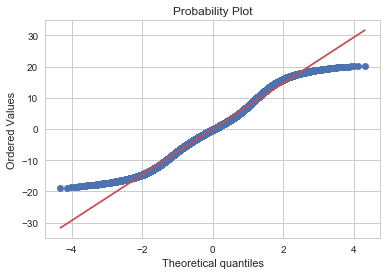

Chi^2       : 407.063
P-value     :  0.000


In [26]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# kfold

In [27]:
df_test.columns

Index(['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday', 'year', 'month', 'day'],
      dtype='object')

In [28]:
X = pd.DataFrame(data=df_test, columns=['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday'])
print(X.shape)
X.head()

(88633, 25)


,date,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,1,9,1,52.0,31.0,42.0,0.0,36.0,40.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,1
1,2012-01-01,1,28,1,52.0,31.0,42.0,0.0,36.0,40.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,1
2,2012-01-01,1,51,1,52.0,31.0,42.0,0.0,36.0,40.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,1
4,2012-01-02,1,28,1,50.0,31.0,41.0,0.0,26.0,35.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,1
5,2012-01-02,1,51,1,50.0,31.0,41.0,0.0,26.0,35.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,1


In [29]:
y = pd.DataFrame(data=df_test, columns=['units'])
print(y.shape)
y.head()

(88633, 1)


,units
0,29
1,2
2,1
4,5
5,1


In [30]:
from sklearn.model_selection import KFold

trial = 4

cv = KFold(n_splits=trial, shuffle=True, random_state=2)

total = 0


for train_index, test_index in cv.split(X):
    print("test index :", test_index, len(test_index))
    print("." * 80)
    print("train index:", train_index, len(train_index))
    print("=" * 80)

    X_train = X.loc[train_index, :]
    X_test = X.loc[test_index, :]
    y_train = y.loc[train_index, :]
    y_test = y.loc[test_index, :]

    model = sm.OLS.from_formula('units ~ resultspeed + cool + heat + preciptotal + depart + C(item_nbr) + C(store_nbr) + is_holiday', data=pd.concat([X_train, y_train], axis=1))
    result = model.fit()
    
    y_hat = result.predict(X_test)
    
    ESS = ((y_hat - y_hat.mean())**2).sum()
    TSS = ((y_test-y_test.mean())**2).sum()
    total += ESS/TSS
    print(ESS/TSS)
    
total/trial

test index : [    0     1     4 ..., 88614 88626 88627] 22159
................................................................................
train index: [    2     3     5 ..., 88630 88631 88632] 66474


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyEr

units    0.895475
dtype: float64
test index : [    2     7     8 ..., 88623 88625 88628] 22158
................................................................................
train index: [    0     1     3 ..., 88630 88631 88632] 66475
units    0.891693
dtype: float64
test index : [    5     6    18 ..., 88624 88629 88632] 22158
................................................................................
train index: [    0     1     2 ..., 88628 88630 88631] 66475
units    0.905838
dtype: float64
test index : [    3    12    15 ..., 88620 88630 88631] 22158
................................................................................
train index: [    0     1     2 ..., 88628 88629 88632] 66475
units    0.893779
dtype: float64


units    0.896696
dtype: float64

# submission preparation

### test file preprocessing

In [31]:
test = pd.read_csv('../../data/basic/test.csv')
print(test.shape)
test.head()

(526917, 3)


,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


In [32]:
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv')

In [33]:
test = pd.merge(test, key)

In [34]:
test = pd.merge(test, weather)

In [35]:
test.columns

Index(['date', 'store_nbr', 'item_nbr', 'station_nbr', 'Unnamed: 0', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [36]:
test = pd.DataFrame(test, columns=['date','dayofweek', 'is_holiday', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       ])

In [37]:
test.head()

,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,sunset,codesum,codesum_YN,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2013-04-01,Mon,workday,2,1,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
1,2013-04-01,Mon,workday,2,2,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
2,2013-04-01,Mon,workday,2,3,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
3,2013-04-01,Mon,workday,2,4,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
4,2013-04-01,Mon,workday,2,5,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0


In [38]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [39]:
test['is_holiday'] = test['is_holiday'].apply(is_holiday)

In [51]:
test['year'] = test['date'].apply(make_year)
test['month'] = test['date'].apply(make_month)
test['day'] = test['date'].apply(make_day)

In [52]:
test.head()

,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,2013-04-01,Mon,0,2,1,14,71.0,42.0,57.0,1.0,...,0.0,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1
1,2013-04-01,Mon,0,2,2,14,71.0,42.0,57.0,1.0,...,0.0,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1
2,2013-04-01,Mon,0,2,3,14,71.0,42.0,57.0,1.0,...,0.0,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1
3,2013-04-01,Mon,0,2,4,14,71.0,42.0,57.0,1.0,...,0.0,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1
4,2013-04-01,Mon,0,2,5,14,71.0,42.0,57.0,1.0,...,0.0,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1


In [53]:
test_sample = test.drop(columns=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'sunrise', 'sunset','depart',  'codesum', 'codesum_YN', 'snowfall',
       'stnpressure', 'sealevel','resultdir', 'avgspeed',
       'station_nbr', 'heat', 'cool', 'preciptotal', 'is_holiday', 'resultspeed'])

In [54]:
test_sample.head()

,date,dayofweek,store_nbr,item_nbr,year,month,day
0,2013-04-01,Mon,2,1,2013,4,1
1,2013-04-01,Mon,2,2,2013,4,1
2,2013-04-01,Mon,2,3,2013,4,1
3,2013-04-01,Mon,2,4,2013,4,1
4,2013-04-01,Mon,2,5,2013,4,1


In [55]:
test_X_df = pd.DataFrame(columns=['date', 'item_nbr', 'store_nbr','dayofweek', 'year', 'month', 'day'])

for nbr in range(1, 45+1):
    store_nbr = df_test[df_test['store_nbr'].isin([nbr])]
    sold_item_list = list(store_nbr['item_nbr'].unique())
    sold_item_list

    test_store_nbr = test_sample[test_sample['store_nbr'].isin([nbr])]
    to_test_df = test_store_nbr[test_store_nbr['item_nbr'].isin(sold_item_list)]

    test_X_df = pd.concat([test_X_df, to_test_df], axis = 0)
    
test_X_df.shape

(25267, 7)

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88633 entries, 0 to 118693
Data columns (total 29 columns):
date           88633 non-null object
units          88633 non-null int64
store_nbr      88633 non-null int64
item_nbr       88633 non-null int64
station_nbr    88633 non-null int64
tmax           88633 non-null float64
tmin           88633 non-null float64
tavg           88633 non-null float64
depart         88633 non-null float64
dewpoint       88633 non-null float64
wetbulb        88633 non-null float64
heat           88633 non-null float64
cool           88633 non-null float64
sunrise        88633 non-null float64
sunset         88633 non-null float64
snowfall       88633 non-null float64
preciptotal    88633 non-null float64
stnpressure    88633 non-null float64
sealevel       88633 non-null float64
resultspeed    88633 non-null float64
resultdir      88633 non-null float64
avgspeed       88633 non-null float64
codesum        88633 non-null object
codesum_YN     88633 non-n

In [57]:
test_X_df.head()

,date,day,dayofweek,item_nbr,month,store_nbr,year
484301,2013-06-04,4,Tue,9,6,1,2013
484320,2013-06-04,4,Tue,28,6,1,2013
484332,2013-06-04,4,Tue,40,6,1,2013
484339,2013-06-04,4,Tue,47,6,1,2013
484343,2013-06-04,4,Tue,51,6,1,2013


In [58]:
test_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25267 entries, 484301 to 514074
Data columns (total 7 columns):
date         25267 non-null object
day          25267 non-null object
dayofweek    25267 non-null object
item_nbr     25267 non-null object
month        25267 non-null object
store_nbr    25267 non-null object
year         25267 non-null object
dtypes: object(7)
memory usage: 1.5+ MB


In [59]:
test_X_df['store_nbr'] = test_X_df['store_nbr'].astype(int)
test_X_df['item_nbr'] = test_X_df['item_nbr'].astype(int)
test_X_df['year'] = test_X_df['year'].astype(int)
test_X_df['month'] = test_X_df['month'].astype(int)
test_X_df['day'] = test_X_df['day'].astype(int)
test_X_df['dayofweek'] = test_X_df['dayofweek'].astype(object)

In [60]:
test_result = result_1.predict(test_X_df)

# create submission file

In [61]:
result = pd.concat([test, test_result], axis=1)

In [62]:
print(result.shape)
result.head()

(526917, 29)


,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,0
0,2013-04-01,Mon,0,2,1,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
1,2013-04-01,Mon,0,2,2,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
2,2013-04-01,Mon,0,2,3,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
3,2013-04-01,Mon,0,2,4,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
4,2013-04-01,Mon,0,2,5,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,54.622984


In [63]:
result['units'] = result[0]

In [64]:
def itiszero(units):
    if units > 0:
        return units
    else:
        return 0

In [65]:
result['units'] = result['units'].apply(itiszero)

In [66]:
result['units'] = result['units'].astype(int)

In [67]:
result = pd.DataFrame(data=result, columns=['store_nbr', 'item_nbr', 'date', 'units'])

In [68]:
for col in result[['store_nbr', 'item_nbr']]:
    result[col] = result[col].astype(int)

In [69]:
result['id'] = result['store_nbr'].astype(str)+'_'+result['item_nbr'].astype(str)+'_'+result['date'].astype(str)

In [70]:
for_submission = result.loc[:,['id','units']]

In [71]:
for_submission.head()

,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,54


In [72]:
for_submission.to_csv('submission_sample4.csv', index=False)

# samplesubmission3
### dayofweek , outlier 5번 제거 ==> 캐글 0.26513
 


 
# samplesubmission4
### dayofweek, year, month, day , outlier 5번 제거 ==> 캐글 